In [1]:
from preprocessors.open_read_check import loader
from preprocessors.save_dataset import save_dataframe
from preprocessors.outliers_boxplot import outliers_box
from eda_tools.heatmap import heatmap
from eda_tools.scatter_plots import scatter_plots
from eda_tools.date_time_trend import datetime_trend
from eda_tools.boxplot import hourly_boxplot

import seaborn as sns
import numpy as np

# EDA - Exploratory Data Analysis
---

### Loading dataset after second stage of preprocessing - working with missing values

In [2]:
df = loader(dir_one="data", dir_two="processed", file_name="AirQualityUCI_missing_impt.csv")
df.head(5)

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime,Hour
0,2004-03-10,18.00.00,2.6,1360.0,11.9,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00,18
1,2004-03-10,19.00.00,2.0,1292.0,9.4,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00,19
2,2004-03-10,20.00.00,2.2,1402.0,9.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00,20
3,2004-03-10,21.00.00,2.2,1376.0,9.2,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00,21
4,2004-03-10,22.00.00,1.6,1272.0,6.5,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00,22


## Determine the correlations between the target parameter C6H6(GT) and the independent parameters

### Heatmap

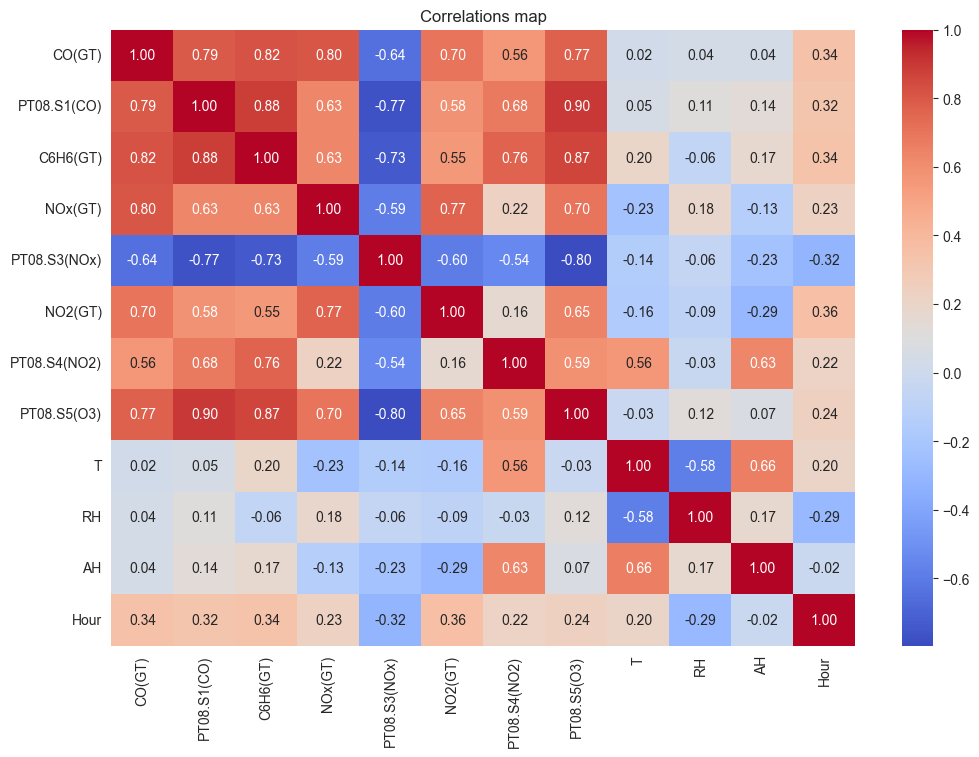

Correlations with C6H6(GT): C6H6(GT)        1.000000
PT08.S1(CO)     0.883865
PT08.S5(O3)     0.865709
CO(GT)          0.824164
PT08.S4(NO2)    0.764672
NOx(GT)         0.632012
NO2(GT)         0.553973
Hour            0.336239
T               0.199247
AH              0.168439
RH             -0.061801
PT08.S3(NOx)   -0.733686
Name: C6H6(GT), dtype: float64


In [3]:
target_corr = heatmap(df)

### Scatter plots

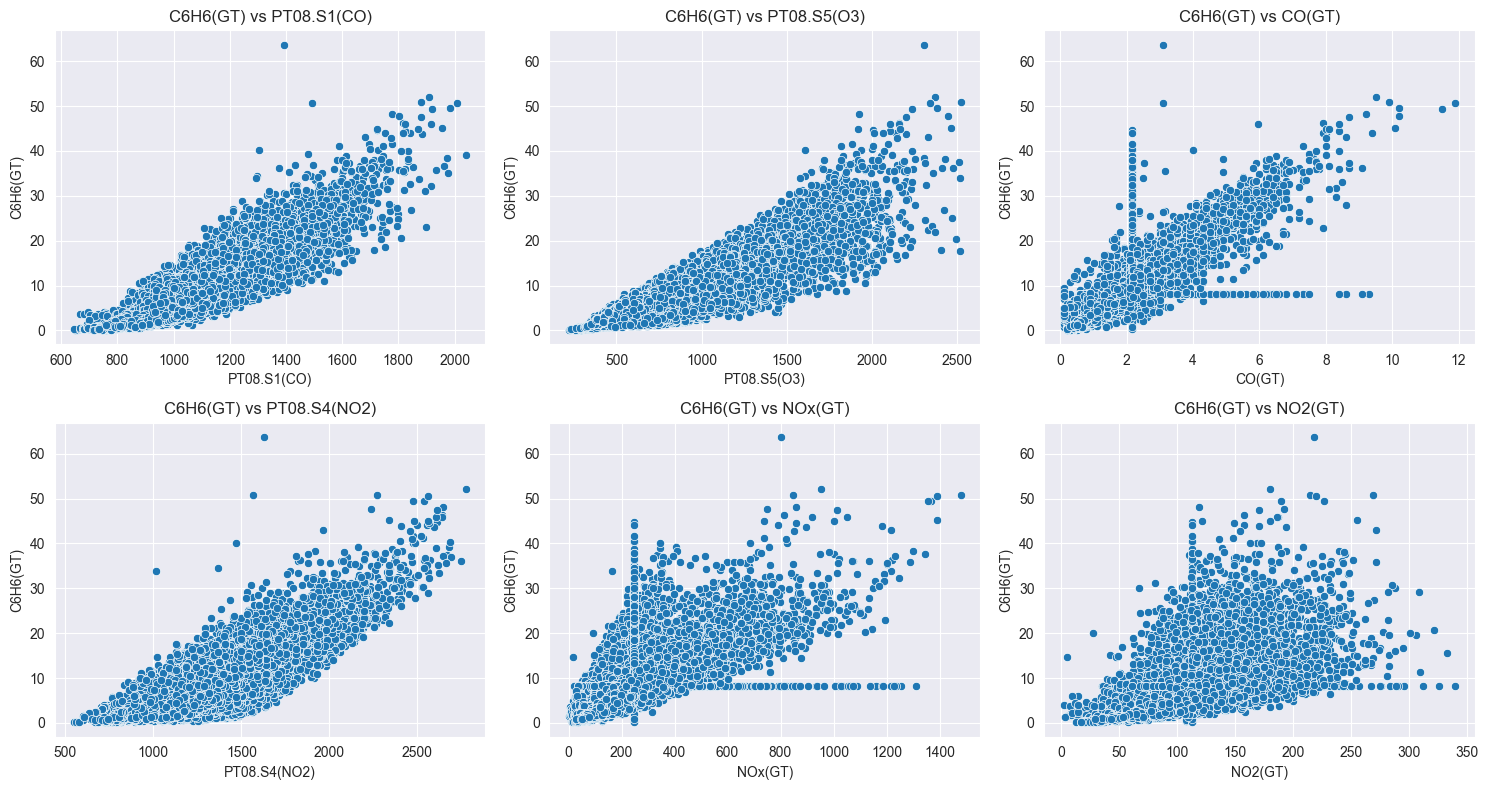

In [4]:
scatter_plots(target_corr, df)

### Pairplots

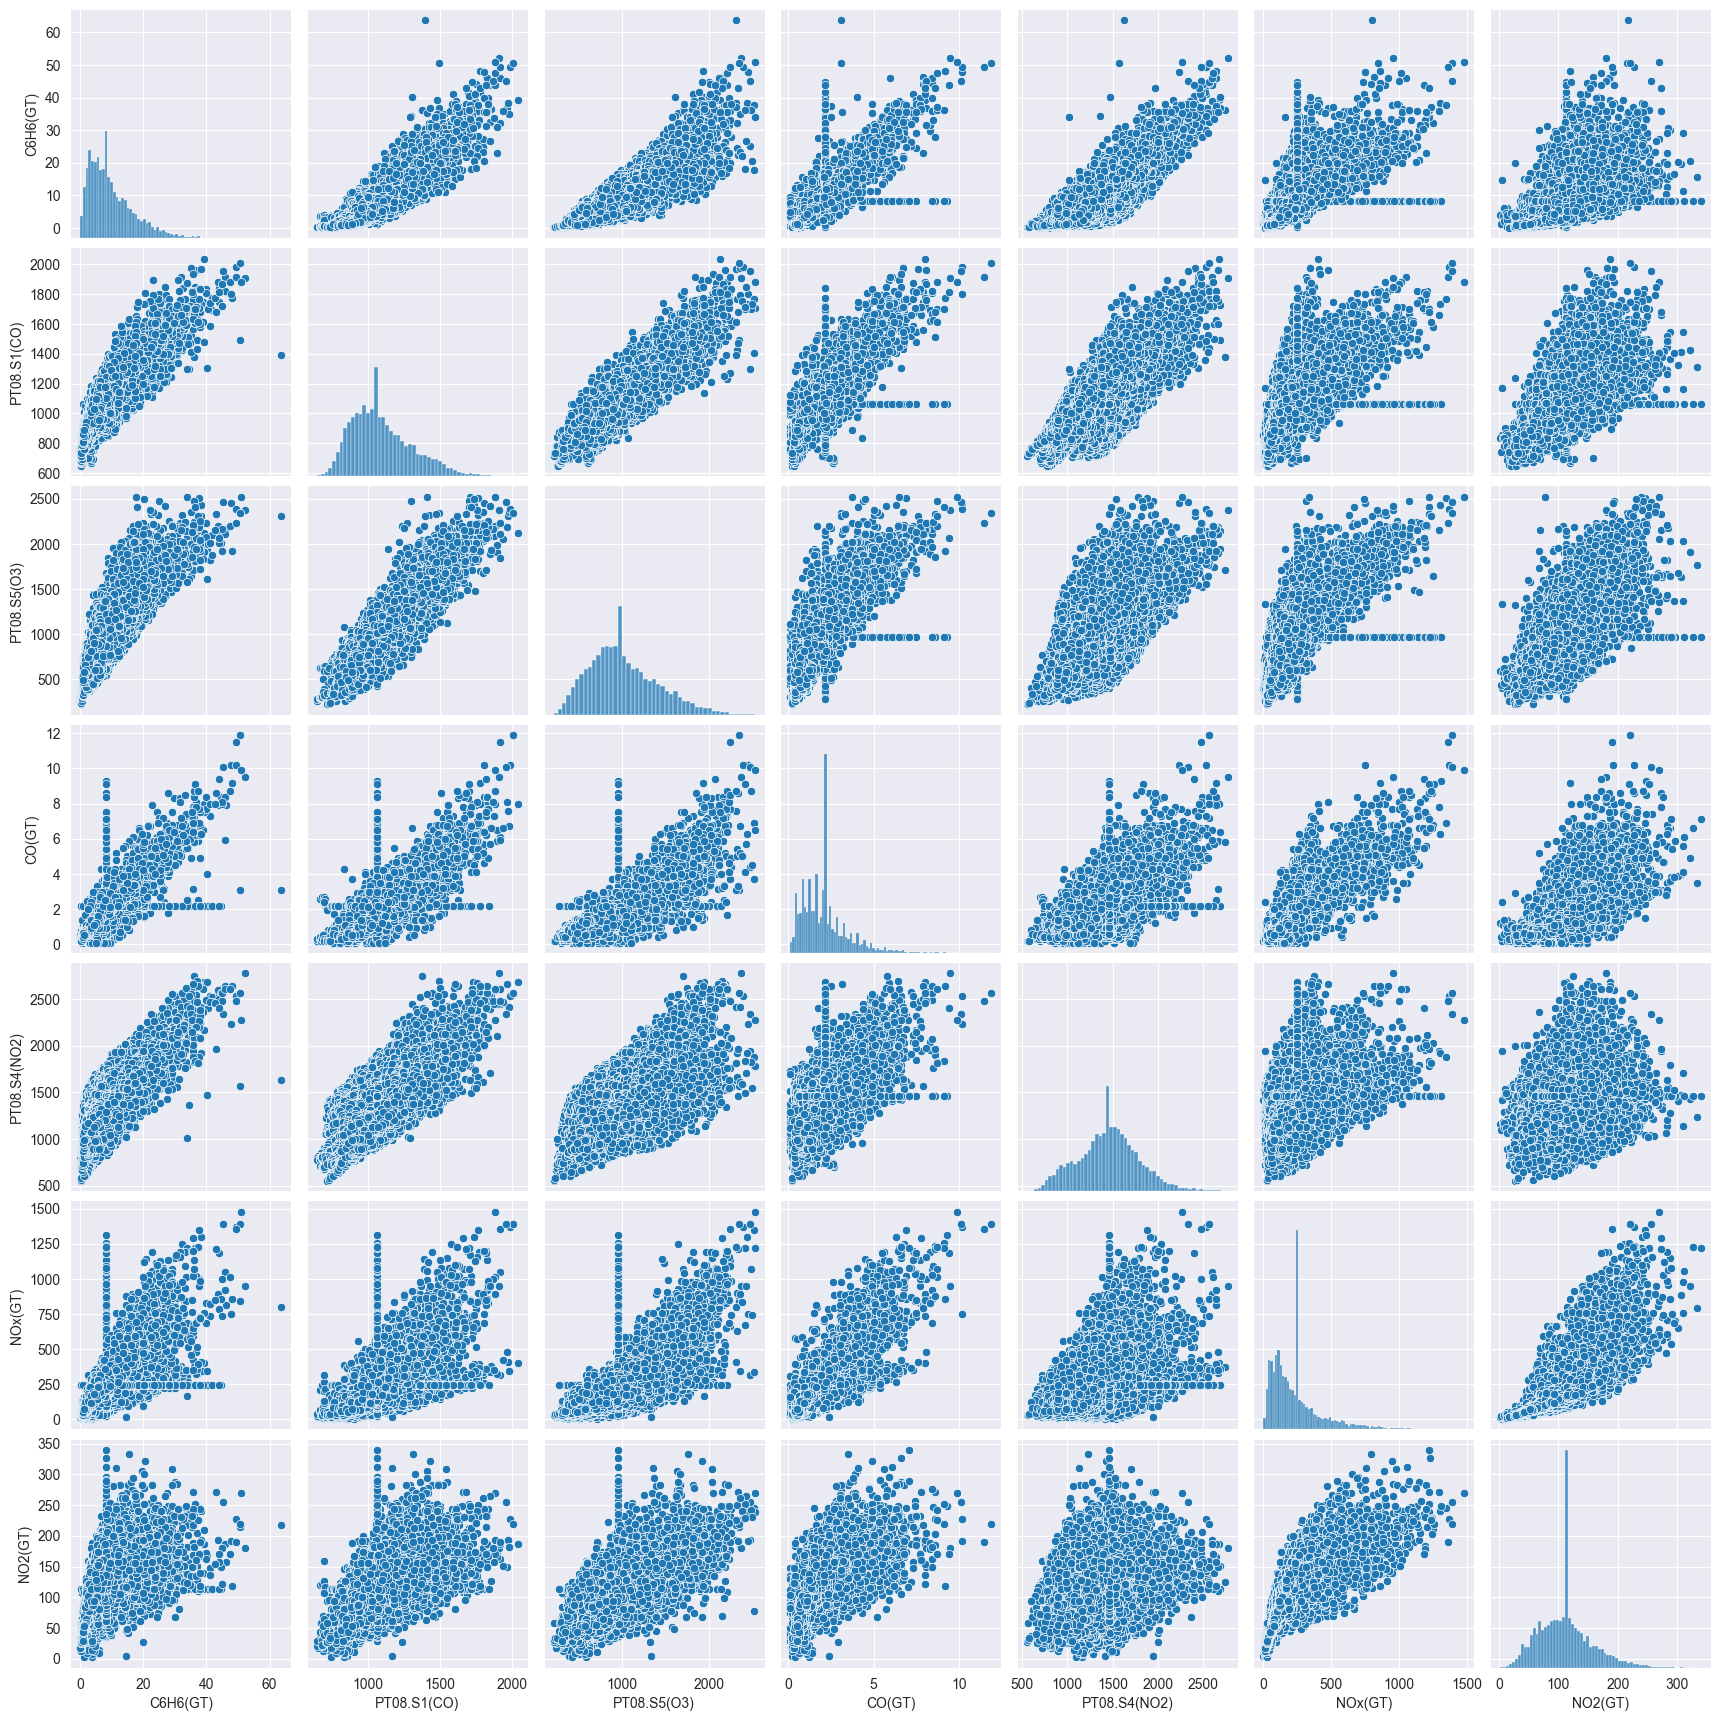

In [5]:
sns.pairplot(df[["C6H6(GT)"] + list(target_corr)])

## Datetime trend

### Smoothed Time Trend of Benzene Concentration

**Goal:**
To identify short-term and long-term patterns in the target variable `C6H6(GT)` (benzene concentration) over time by applying rolling averages with different window sizes.

**Parameters used:**
- **1h rolling mean** – to highlight local fluctuations and short-term spikes.
- **12h rolling mean** – to observe daily variations and identify potential daily cycles.
- **7d rolling mean** – to reveal broader weekly trends and long-term movements.

All rolling windows are time-based, with a properly sorted `DatetimeIndex` to ensure accurate temporal aggregation.

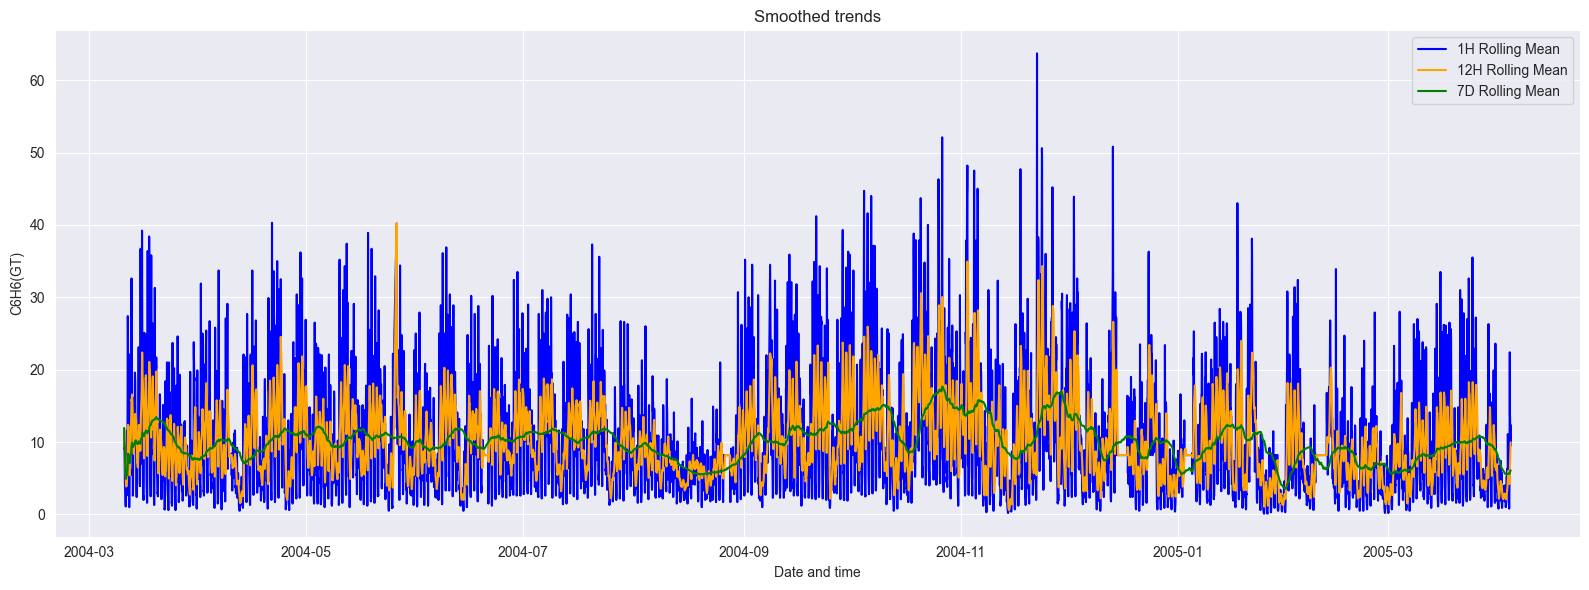

In [6]:
datetime_trend(df)

### Observations & Interpretation

- **Clear seasonal pattern:**
  The 7-day rolling mean (green)  clearly reveals a **regular long-term trend** in benzene concentration. This suggests the presence of **seasonal effects**, likely tied to weather changes or human activity cycles across the year.

- **Stable intra-day behavior:**
  The 12-hour rolling mean (orange) shows **consistent daily oscillations**, likely driven by diurnal patterns such as traffic peaks or temperature shifts. These fluctuations appear relatively stable across the entire dataset.

- **High-frequency noise and spikes:**
  The 1-hour rolling mean (blue) still exhibits **frequent local spikes**, capturing short-lived events or outliers — possibly linked to localized environmental factors like industrial emissions or sudden traffic bursts.

---

**Conclusion:**
The smoothed trends provide a **clear, interpretable picture** of benzene concentration over time. These patterns strongly support the use of **time series models (e.g., SARIMA, LSTM)**, and will also guide **feature engineering** and **anomaly detection** in downstream analysis.


## Hourly Distribution of Benzene Concentration

**Goal:**
To analyze the distribution of `C6H6(GT)` (benzene concentration) across different hours of the day in order to identify time-of-day effects and daily pollution cycles.

**What we aim to uncover:**
- Whether specific hours consistently show higher or lower median benzene levels.
- The range and variability of benzene concentration per hour.
- Presence of outliers indicating sporadic pollution spikes at particular times.
- Overall structure of diurnal (24-hour) trends in air quality.

**Method:**
A boxplot was generated using the `Hour` extracted from the `DateTime` column. Each box represents the interquartile range (IQR) of values for a given hour, with median lines and outlier points clearly marked.

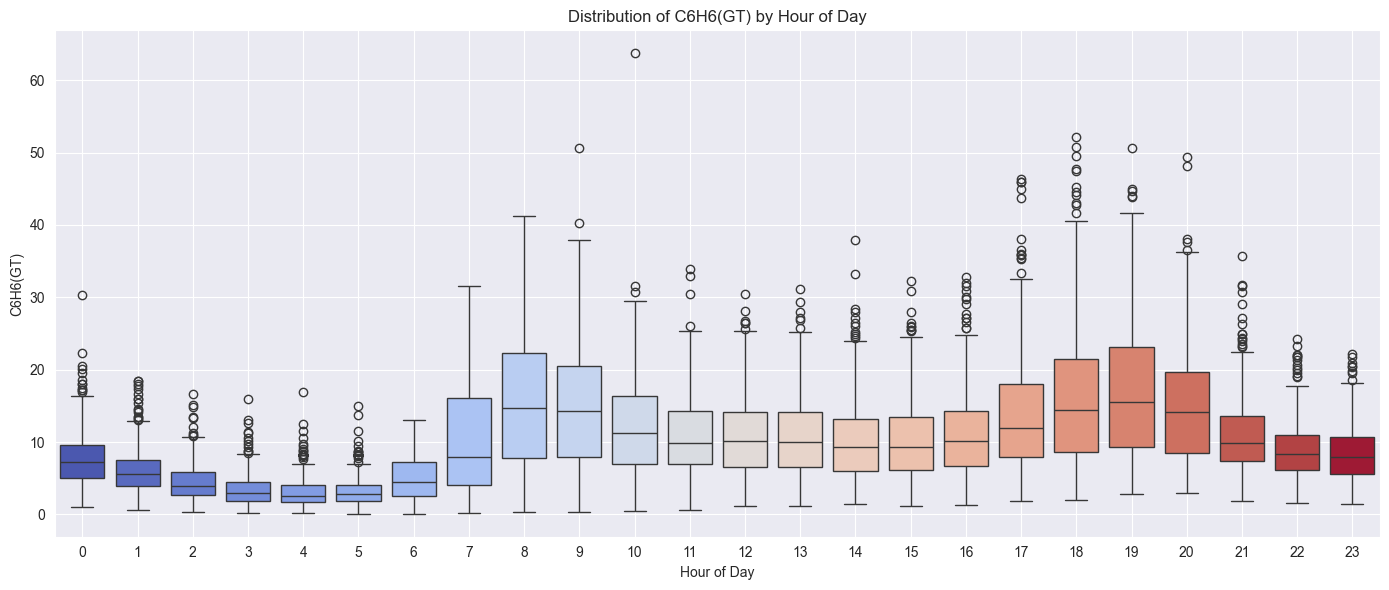

In [7]:
hourly_boxplot(df)

### Key Observations from the Boxplot

1. **Lowest concentrations (03:00–06:00):**
   - Very low median values (approx. 2–4). Narrow interquartile ranges. Minimal presence of outliers.
   - Indicates low human and traffic activity during night hours.
<br>
<br>
2. **Sharp rise in early morning (07:00–09:00):**
   - Steep increase in median values. Higher variance and more frequent outliers.
   - Corresponds to morning rush hour and increased vehicle emissions.
<br>
<br>
3. **Midday stability (10:00–16:00):**
   - Moderate and consistent median levels. Sustained interquartile range.
   - Reflects daytime urban activity and environmental variability.
<br>
<br>
4. **Evening peak (17:00–20:00):**
   - Second significant rise in benzene levels. Broad distributions and frequent high outliers.
   - Aligns with evening traffic and post-work human activity.
<br>
<br>
5. **Late-night decline (21:00–01:00):**
   - Gradual decrease in concentration. Reduced spread and fewer extreme values.
   - Nighttime quiet period with limited emissions.

### Interpretation

The plot reveals a strong pattern in benzene concentration, driven by human behavior and urban traffic cycles. There are two clear pollution peaks:
- Morning (commuting hours)
- Evening (post-work movement)

This insight confirms that **hour-of-day is a significant predictive feature** for modeling air quality or benzene forecasting.

## Preparing to ML
---

### Let`s check outliers in whole dataset

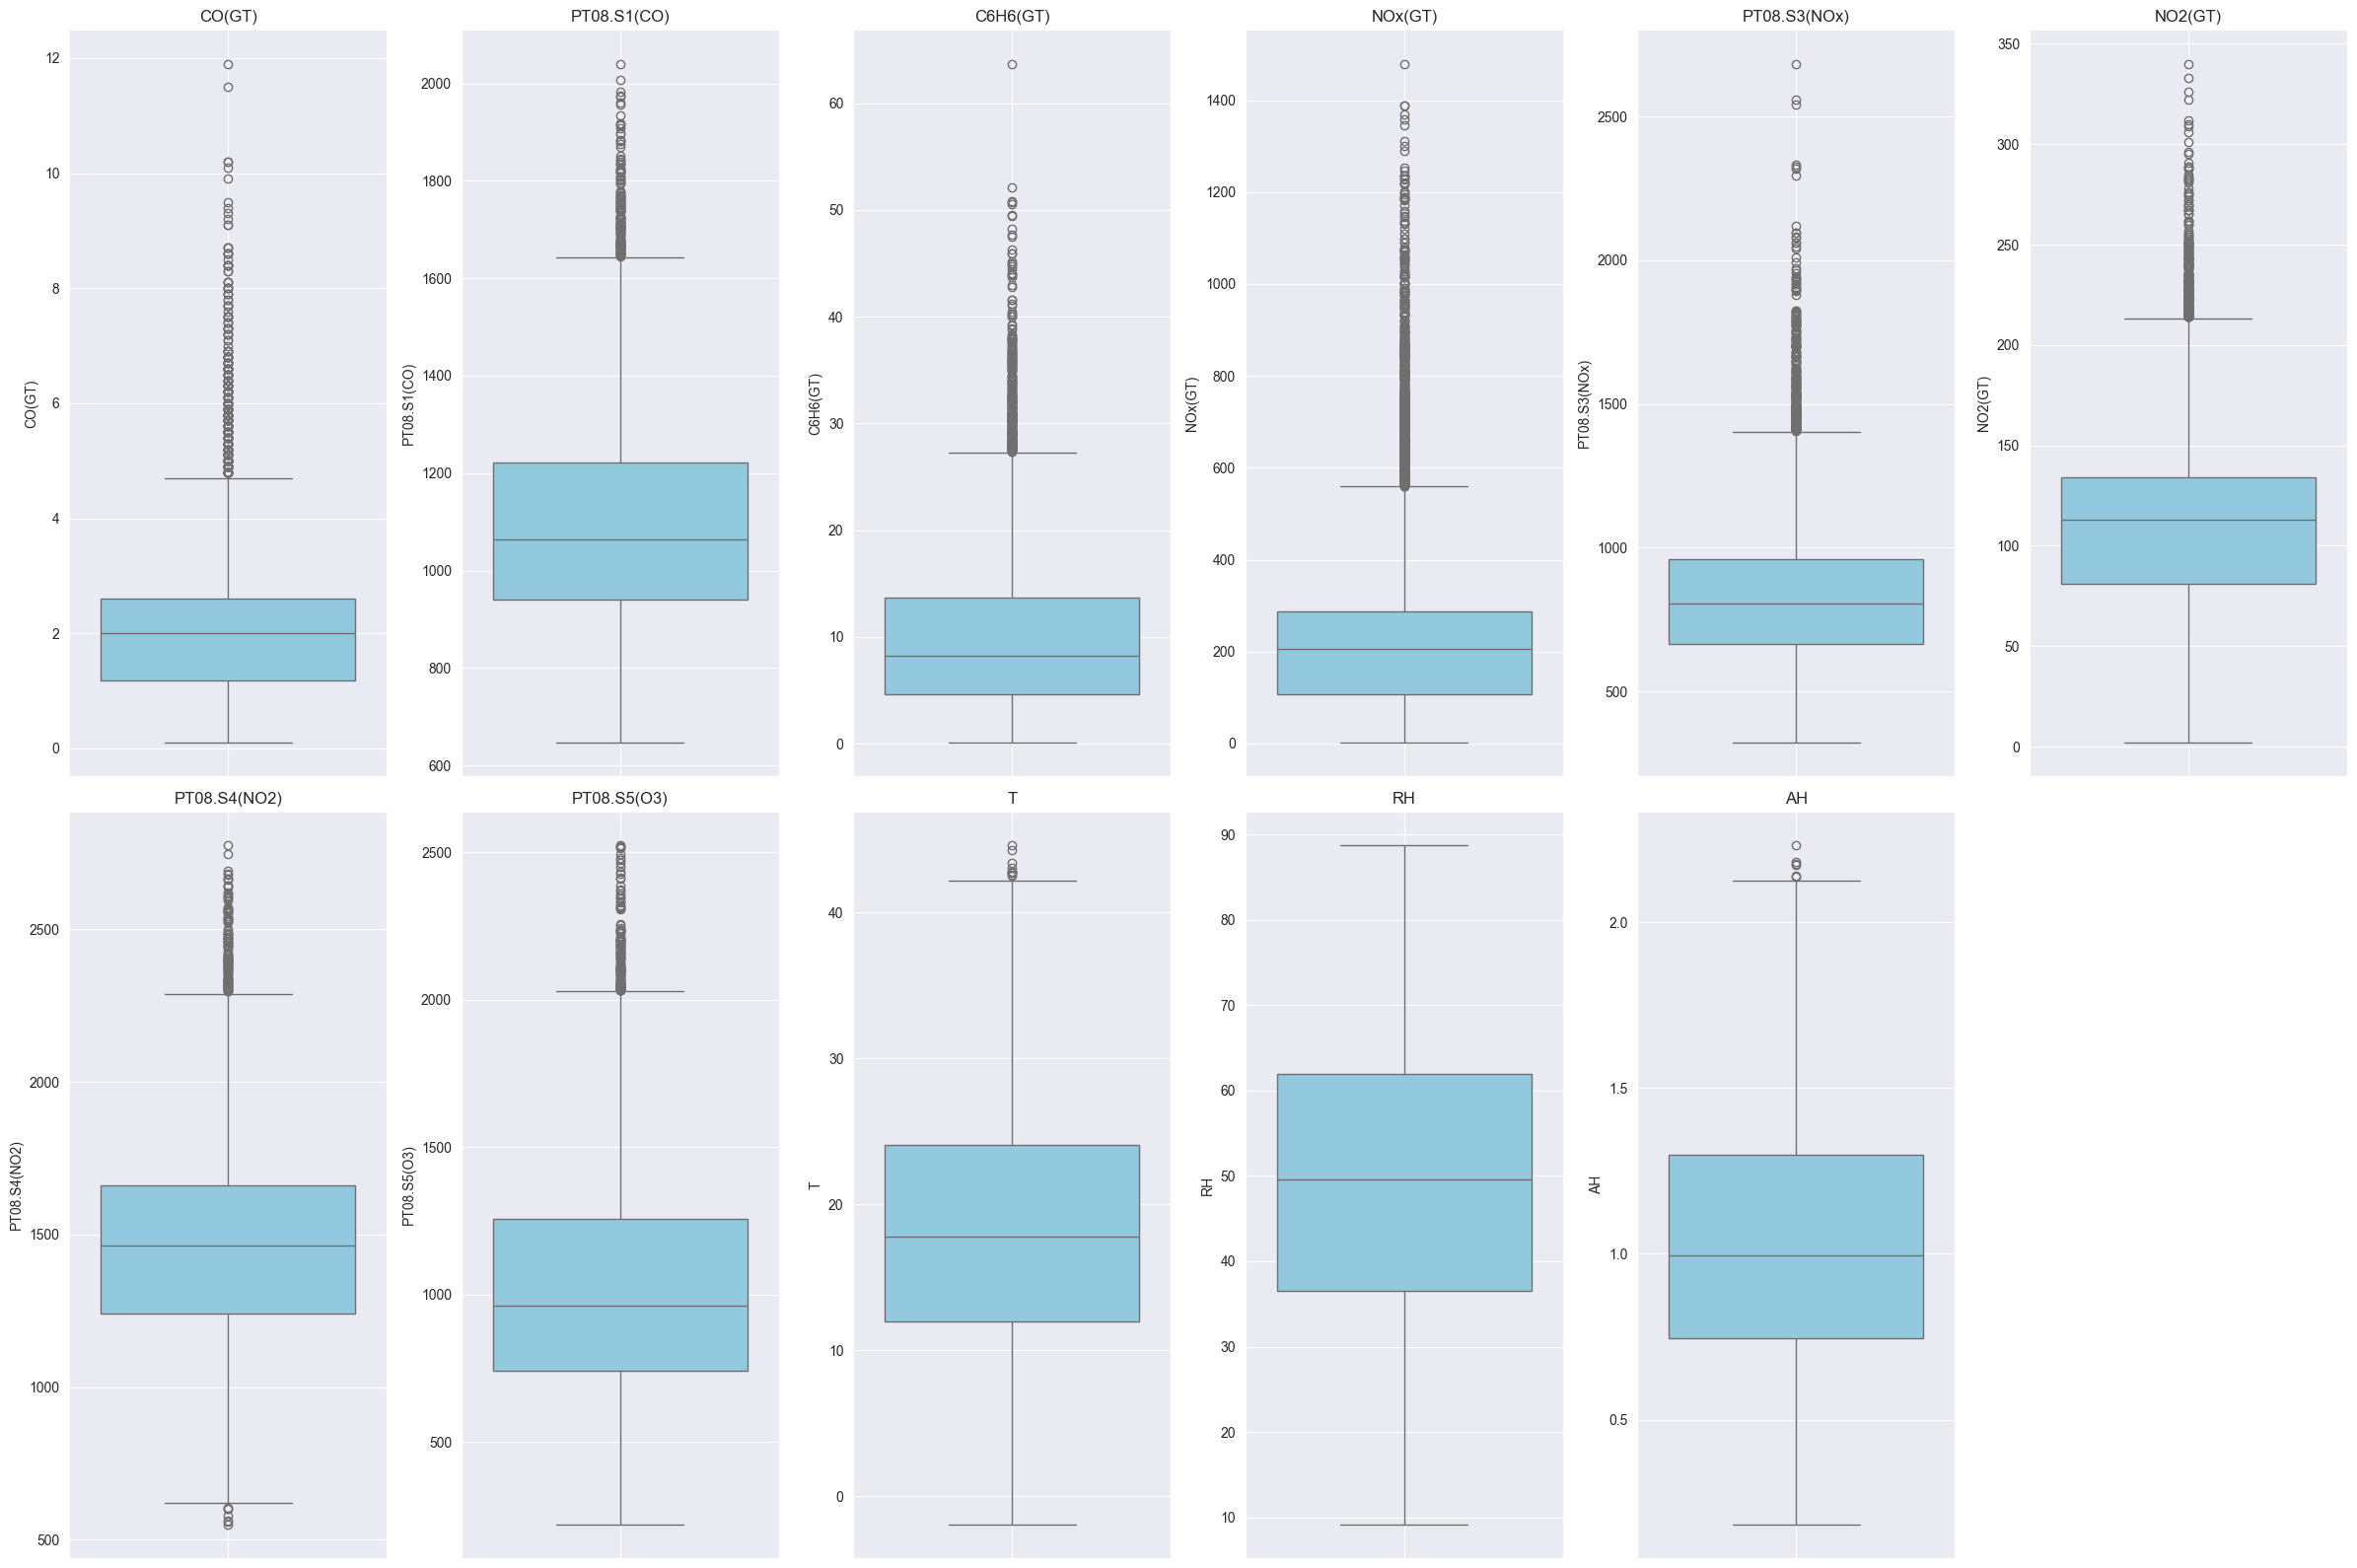

In [8]:
outliers_box(df)